# **CONFIG**

In [28]:
class Configuration:
    def __init__(self):
        super(Configuration, self).__init__()
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.data_train_path = '../input/mmnist/mnist_test_seq.npy'
        self.data_test_path = '../input/kthextract-to-jpg/data/test'
        self.input_length = 10
        self.output_length = 10
        self.real_length = 20
        self.total_length = 20
        self.img_height = 64
        self.img_width = 64
        self.sr_size = 4
        self.img_channel = 1
        self.patch_size = 1
        self.alpha = 1
        self.model_name = 'mau'
        self.dataset = 'custom'
        self.cell_mode = 'normal'
        self.model_mode = 'recall'
        self.num_workers = 2
        self.num_hidden = 64
        self.num_layers = 2
        self.num_heads = 2
        self.filter_size = (5, 5)
        self.stride = 1
        self.time = 2
        self.time_stride = 1
        self.tau = 7
        self.is_training = True
        self.lr = 2e-4
        self.lr_decay = 0.90
        self.delay_interval = 2000
        self.batch_size = 16
        self.max_iterations = 150000
        self.max_epoches = 10
        self.display_interval = 75
        self.plot_interval = 75
        self.test_interval = 1010
        self.snapshot_interval = 1000
        self.num_save_samples = 3
        self.n_gpu = 1
        self.pretrained_model_g = '../input/evenmoreganwts/model_g.ckpt-2000'
        self.pretrained_model_d = '../input/evenmoreganwts/model_d.ckpt-2000'
        self.perforamnce_dir = 'results/custom'
        self.save_dir = 'saves/custom'
        self.gen_frm_dir = 'results/custom/'
        self.scheduled_sampling = True
        self.sampling_stop_iter = 50000
        self.sampling_start_value = 0.80
        self.sampling_changing_rate = 0.00007
        self.gan = True
        self.verbose = False
        
configs = Configuration()
args = configs

## TEST CASE

In [29]:
def test_model(configs):
    nl = 4
    nh = [64, 64, 64, 64]
    z = torch.randn(1, 20, 3, 200, 160).to(configs.device)
    m = torch.zeros(1, 9, 200, 160, 3).to(configs.device)
    model = RNN(nl, nh, configs).to(configs.device)
    g = model(z, m, True)
    print(g.shape)

# test_model(configs)

# **TRAIN**

Initializing models
Load predictive model: ../input/evenmoreganwts/model_g.ckpt-2000
Validate:
Evaluating...
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [on]


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

Loading model from: /opt/conda/lib/python3.7/site-packages/lpips/weights/v0.1/alex.pth


  0%|          | 0/3000 [00:00<?, ?it/s]

1.1391041278839111 1.3773788213729858


  2%|▏         | 49/3000 [00:11<06:26,  7.64it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


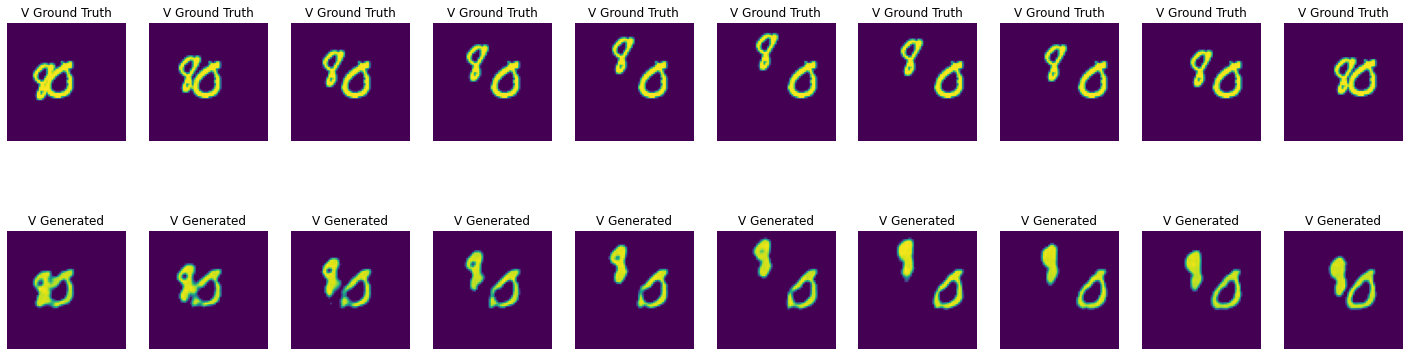

  3%|▎         | 99/3000 [00:19<06:33,  7.37it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


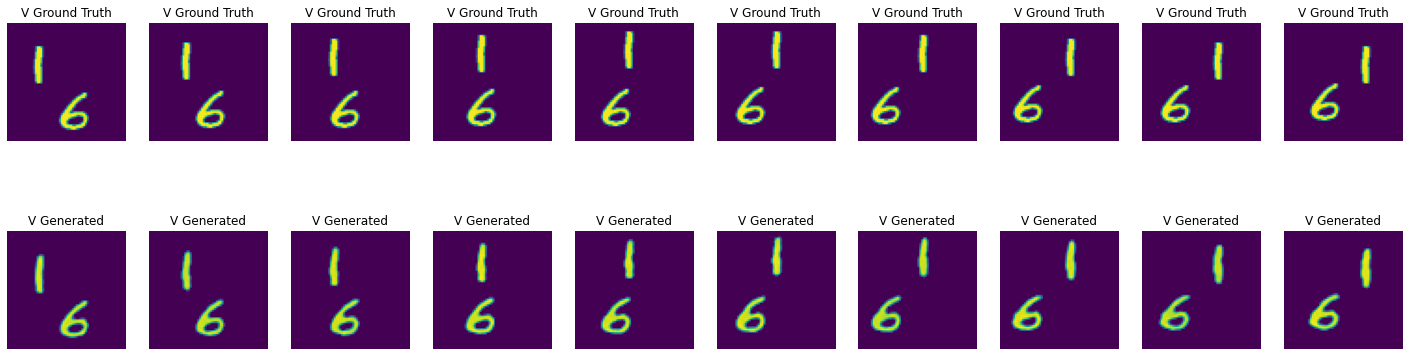

  5%|▍         | 149/3000 [00:27<07:24,  6.41it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


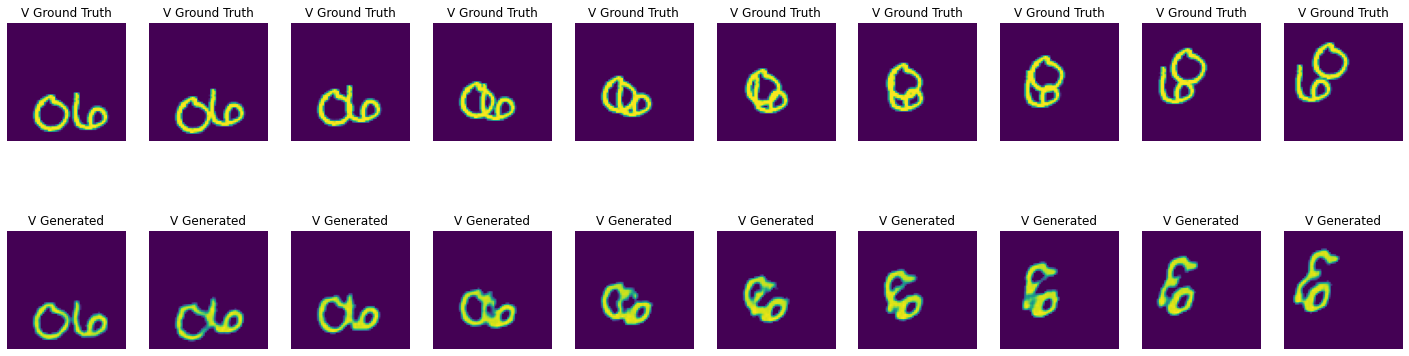

  7%|▋         | 199/3000 [00:34<06:09,  7.59it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


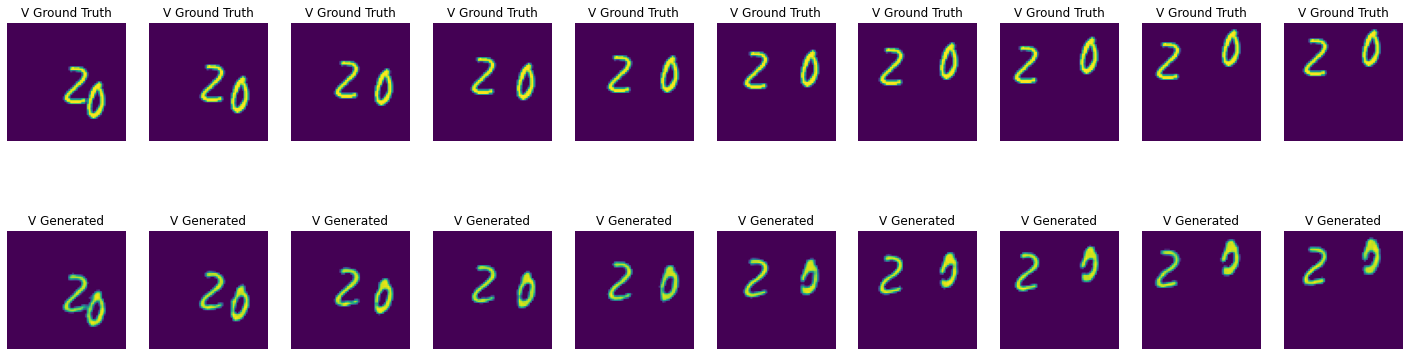

  8%|▊         | 238/3000 [00:41<06:10,  7.45it/s]

1.1391041278839111 1.3773788213729858


  8%|▊         | 249/3000 [00:42<06:03,  7.56it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


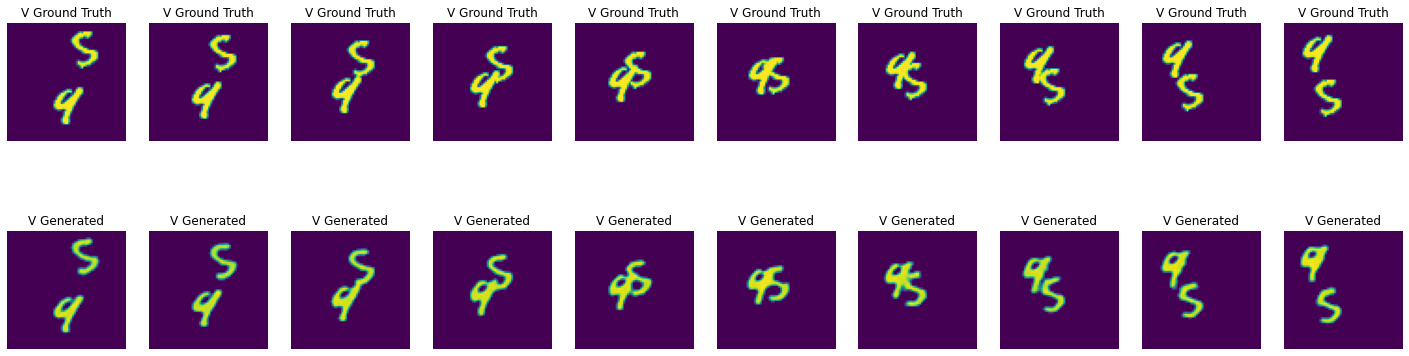

 10%|▉         | 299/3000 [00:50<06:07,  7.35it/s]

[[0.5411765  0.99607843]
 [0.84705883 0.9137255 ]]
[[0.8142507  0.96097255]
 [0.97448516 0.98867965]]


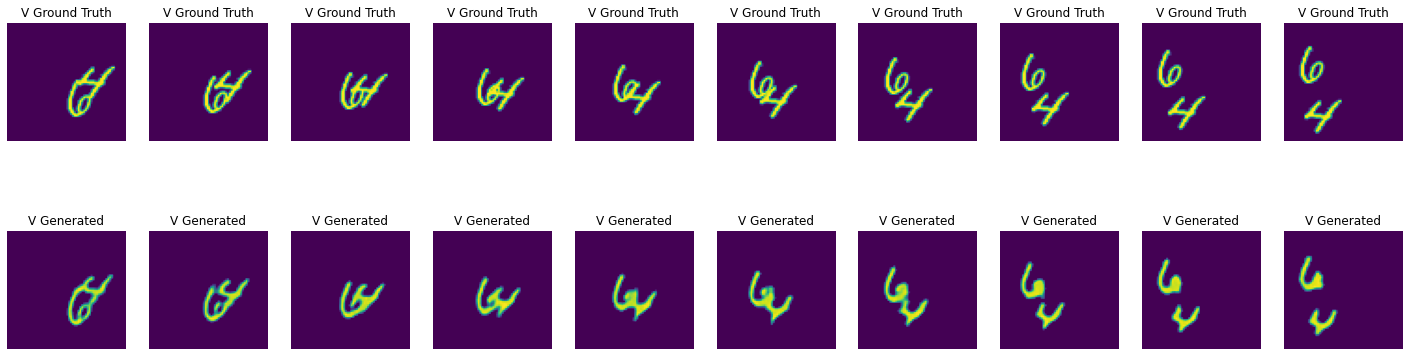

 12%|█▏        | 349/3000 [00:57<05:49,  7.58it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


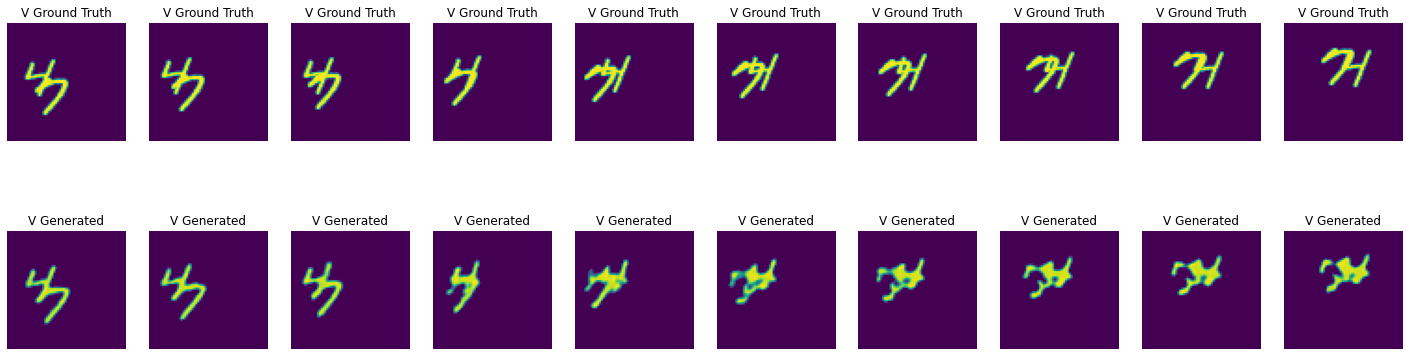

 13%|█▎        | 399/3000 [01:05<05:39,  7.65it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


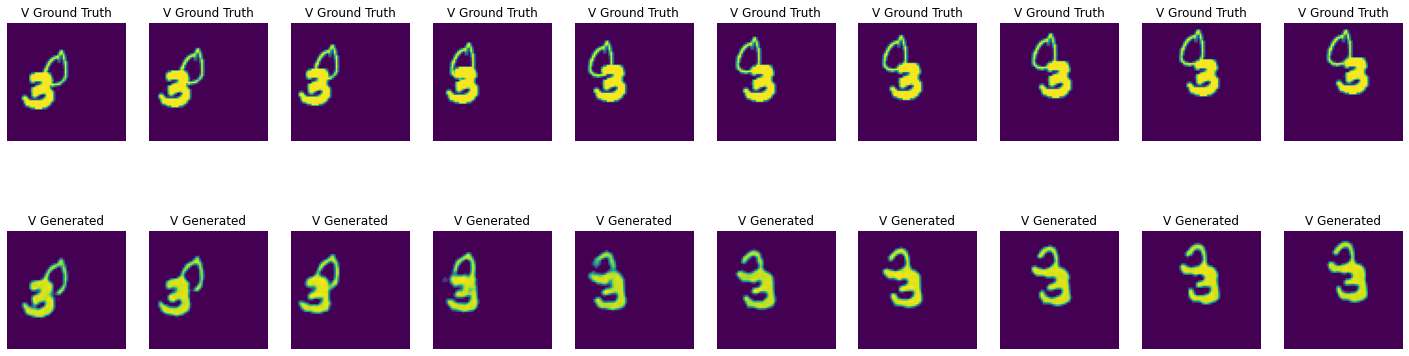

 15%|█▍        | 449/3000 [01:13<05:34,  7.62it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


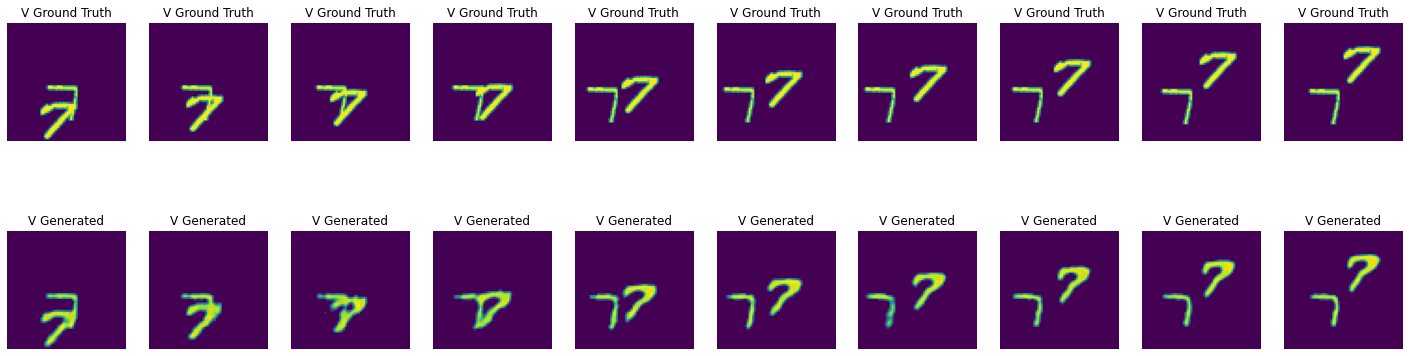

 16%|█▌        | 475/3000 [01:17<05:30,  7.63it/s]

1.1391041278839111 1.3773788213729858


 17%|█▋        | 499/3000 [01:20<05:26,  7.65it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


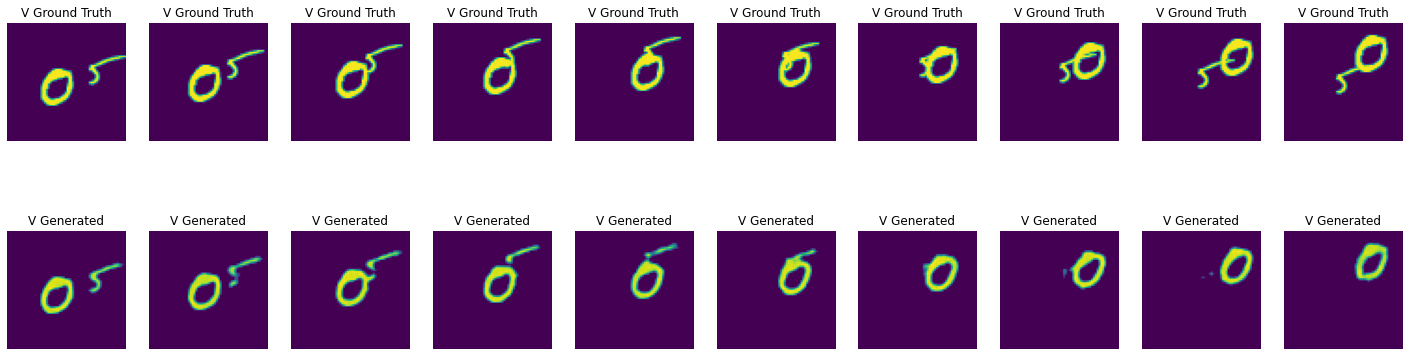

 18%|█▊        | 549/3000 [01:28<05:24,  7.56it/s]

[[0. 0.]
 [0. 0.]]
[[0.71803606 0.91642535]
 [0.5011351  0.82620454]]


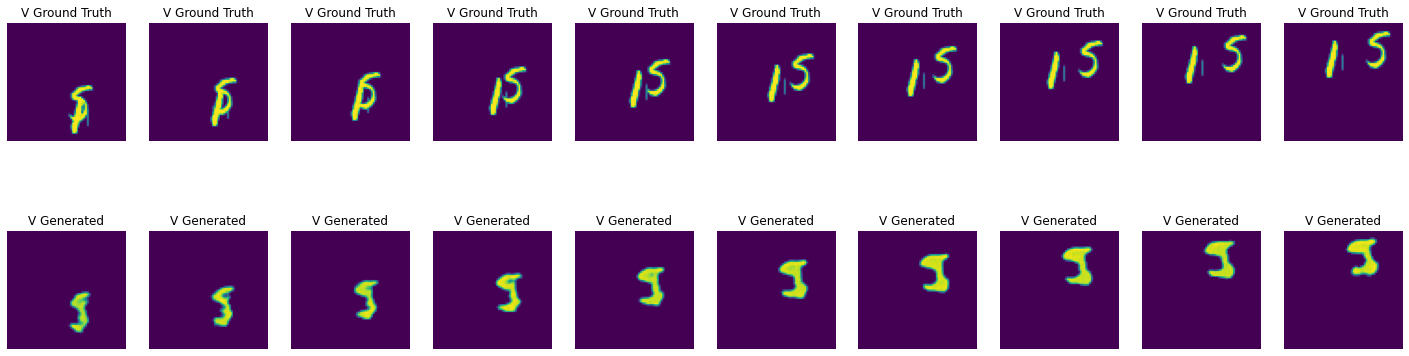

 20%|█▉        | 599/3000 [01:35<05:17,  7.56it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


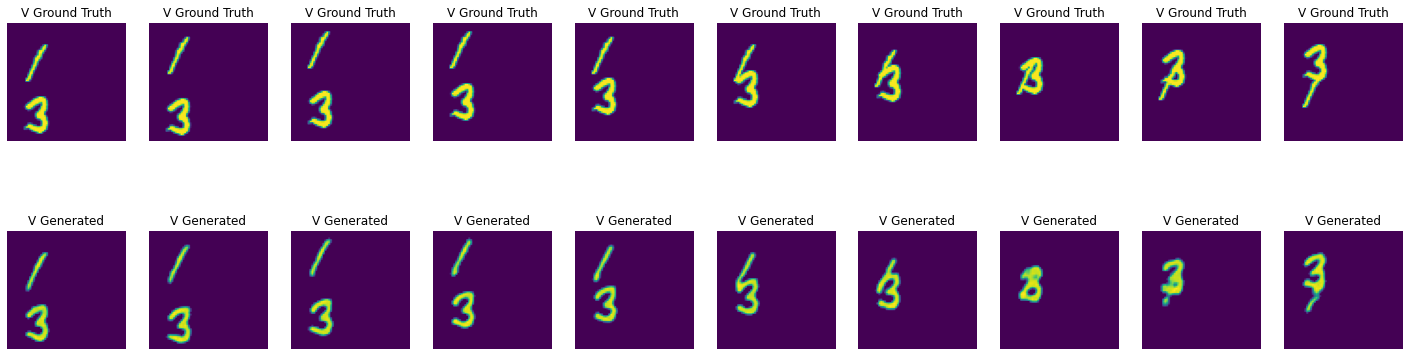

 22%|██▏       | 649/3000 [01:43<05:14,  7.48it/s]

[[1.         0.77254903]
 [0.99215686 0.9882353 ]]
[[0.94863534 0.9345472 ]
 [0.9510883  0.9195962 ]]


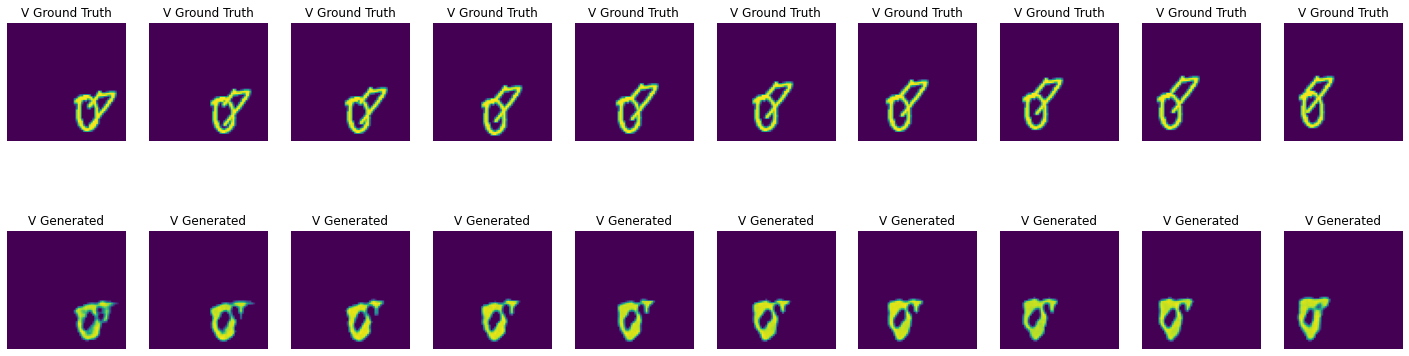

 23%|██▎       | 699/3000 [01:51<05:04,  7.55it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


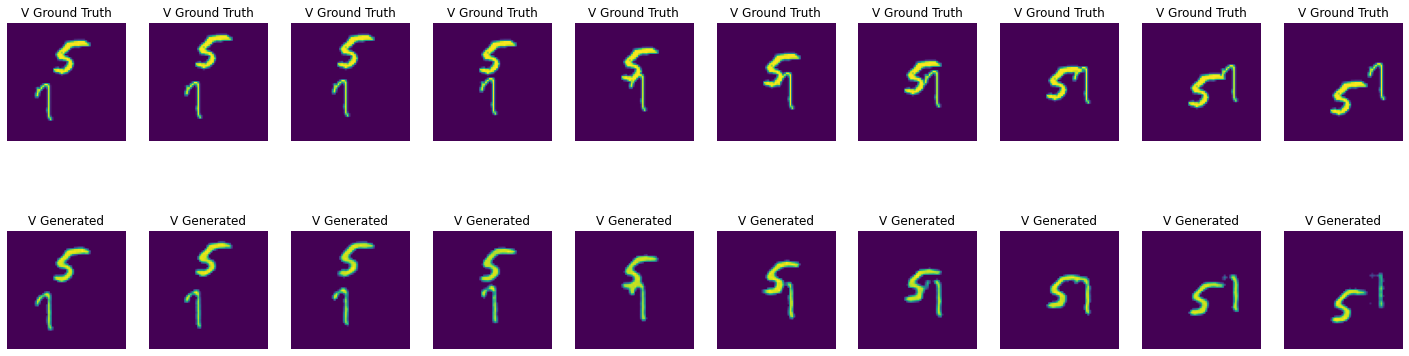

 24%|██▎       | 711/3000 [01:53<05:18,  7.20it/s]

1.1391041278839111 1.3773788213729858


 25%|██▍       | 749/3000 [01:58<04:56,  7.58it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


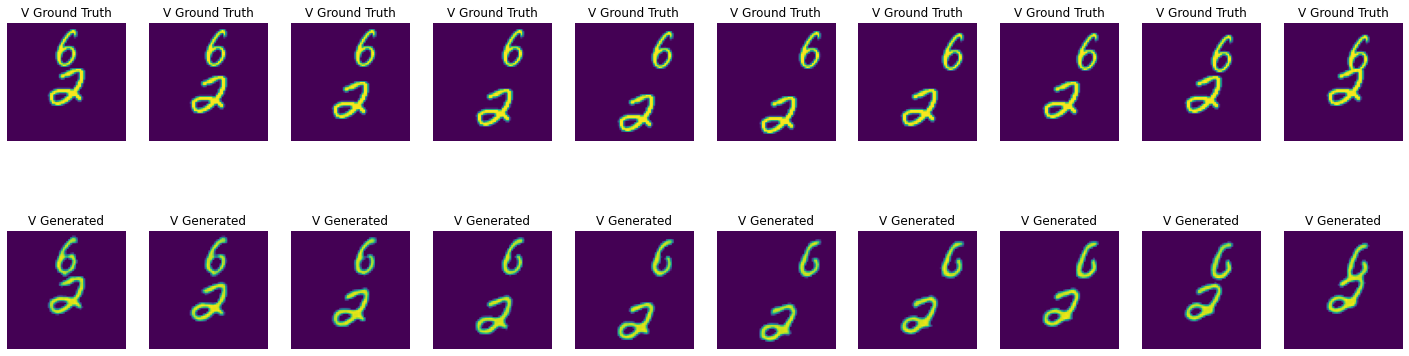

 27%|██▋       | 799/3000 [02:06<05:47,  6.34it/s]

[[0.6862745  0.9882353 ]
 [0.14509805 0.9882353 ]]
[[0.99331653 0.9890741 ]
 [0.7286544  1.0322031 ]]


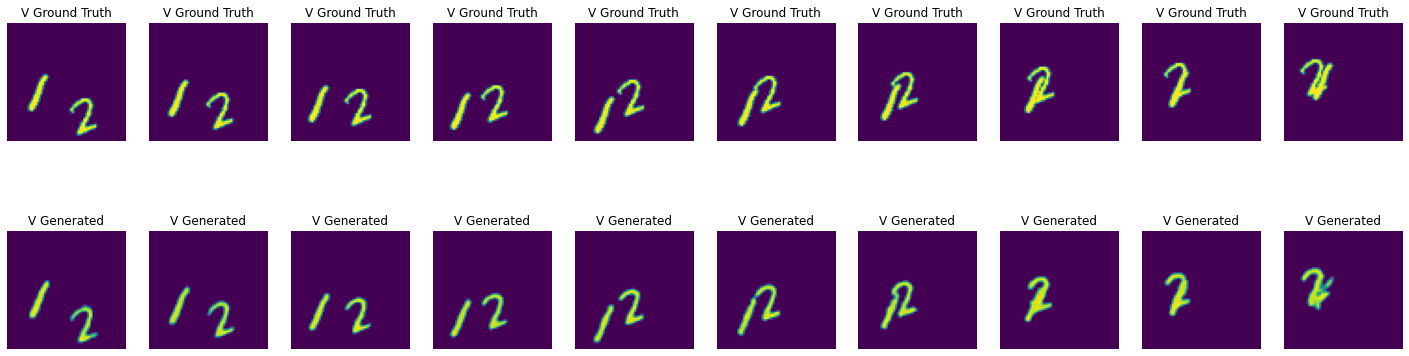

 28%|██▊       | 849/3000 [02:14<04:50,  7.39it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


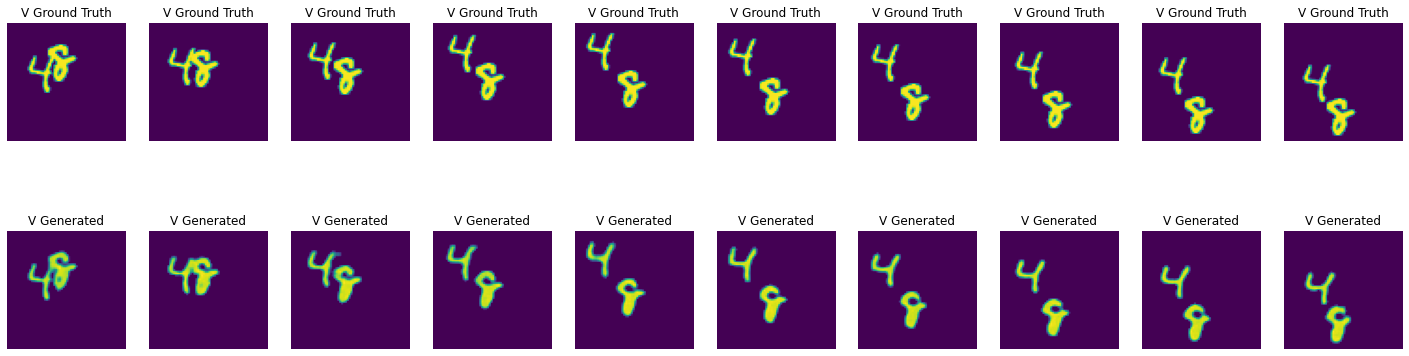

 30%|██▉       | 899/3000 [02:22<04:51,  7.21it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


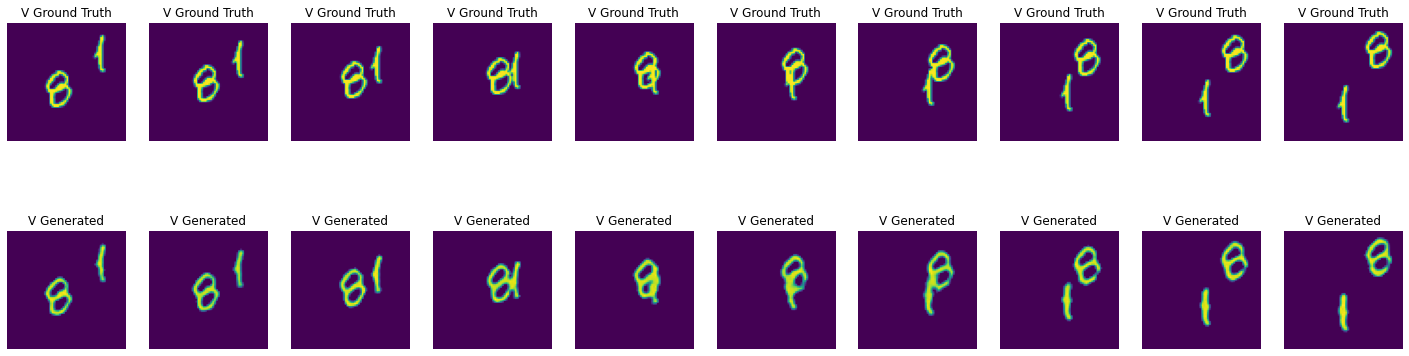

 32%|███▏      | 948/3000 [02:29<04:37,  7.40it/s]

1.1391041278839111 1.3773788213729858


 32%|███▏      | 949/3000 [02:29<04:36,  7.41it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


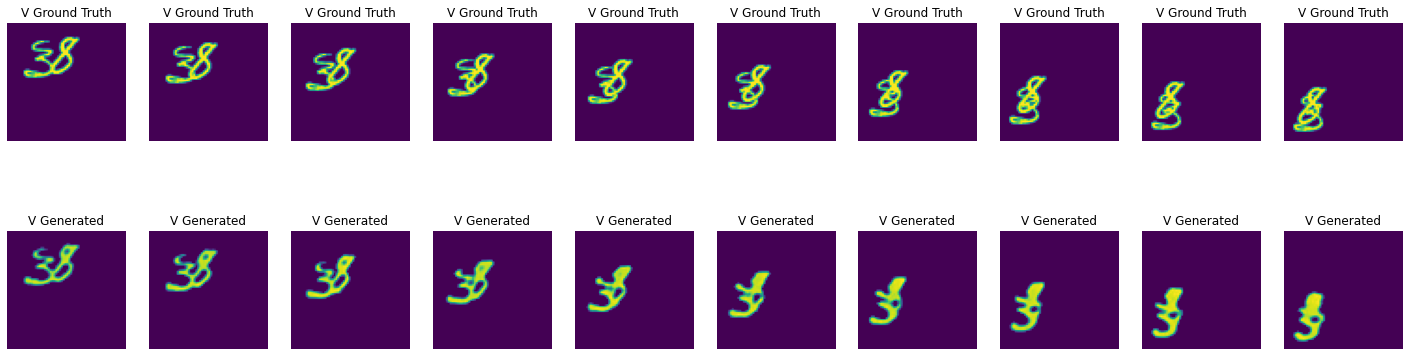

 33%|███▎      | 999/3000 [02:37<04:25,  7.53it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


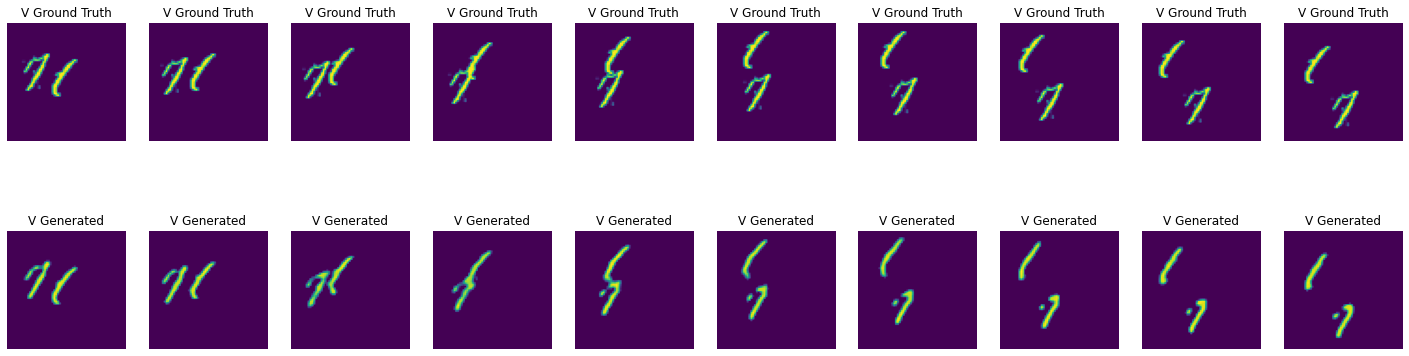

 35%|███▍      | 1049/3000 [02:44<04:19,  7.51it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


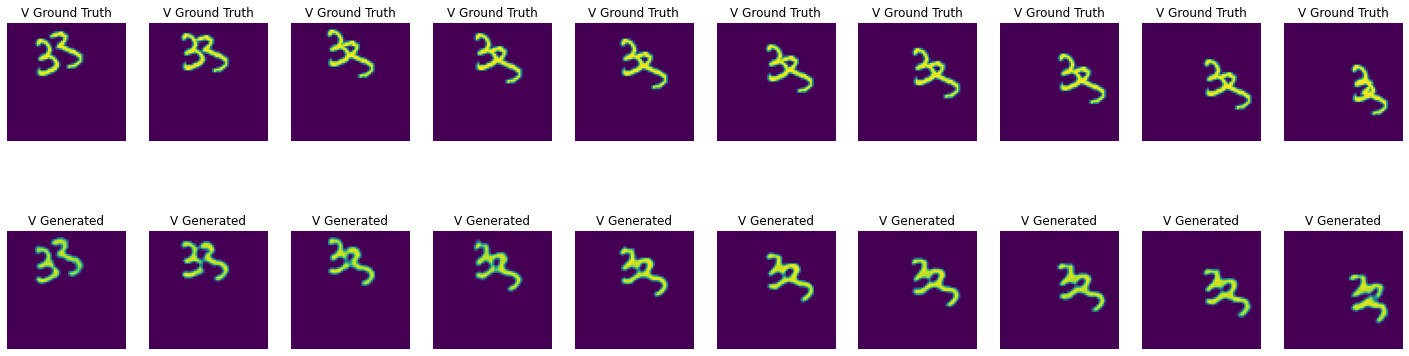

 37%|███▋      | 1099/3000 [02:52<04:45,  6.66it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


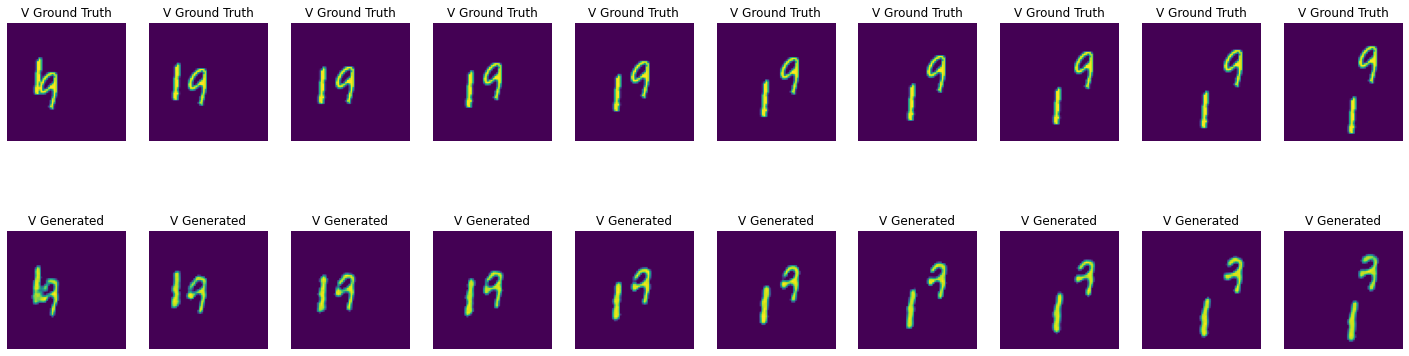

 38%|███▊      | 1149/3000 [03:00<04:02,  7.62it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


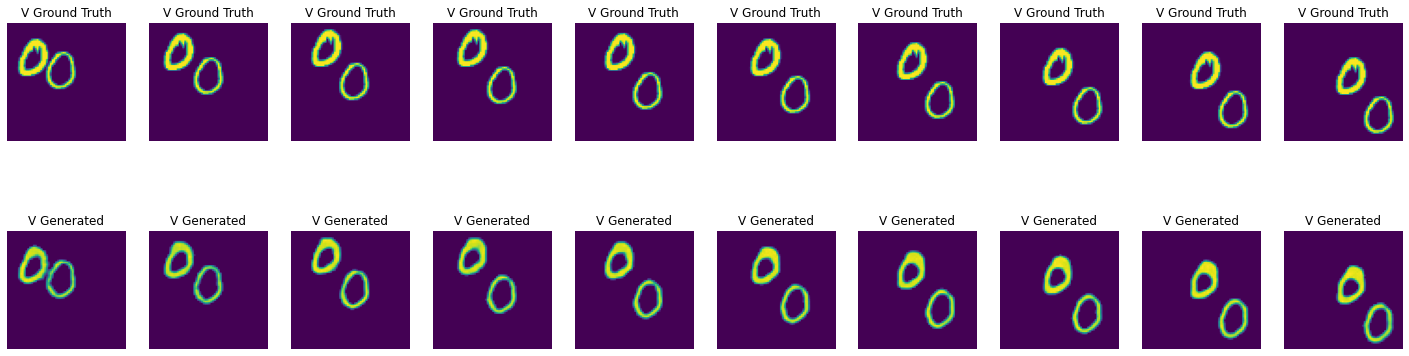

 40%|███▉      | 1185/3000 [03:06<04:01,  7.53it/s]

1.1391041278839111 1.3773788213729858


 40%|███▉      | 1199/3000 [03:08<03:55,  7.64it/s]

[[0.99215686 0.45490196]
 [0.99215686 0.45490196]]
[[0.9415995  0.44001952]
 [0.92265725 0.33935142]]


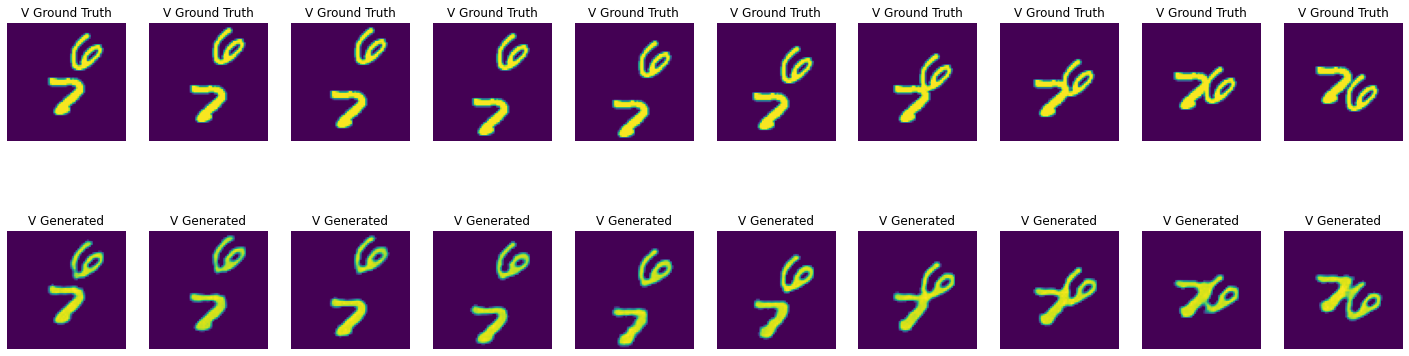

 42%|████▏     | 1249/3000 [03:15<03:51,  7.57it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


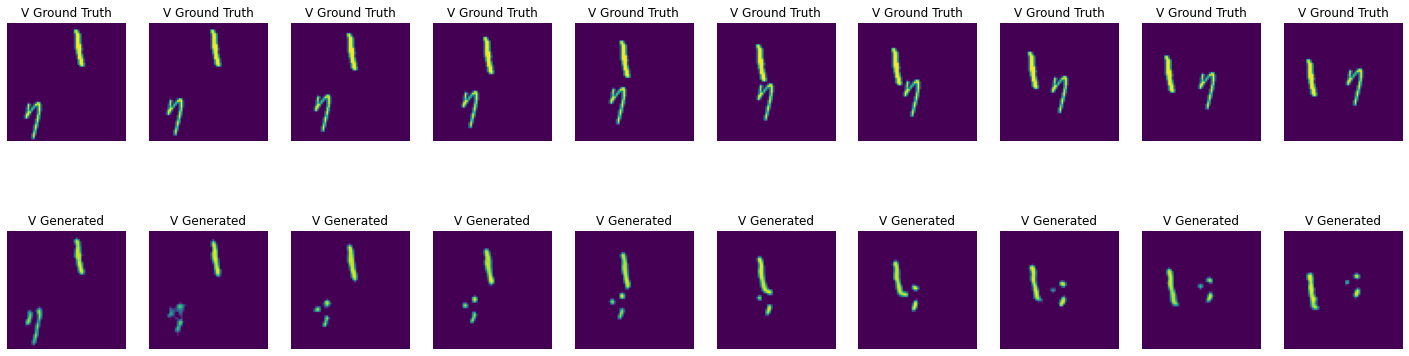

 43%|████▎     | 1299/3000 [03:23<04:23,  6.45it/s]

[[0.3372549  0.99607843]
 [0.81960785 0.99215686]]
[[0.58955216 0.91513824]
 [0.63767695 0.97441125]]


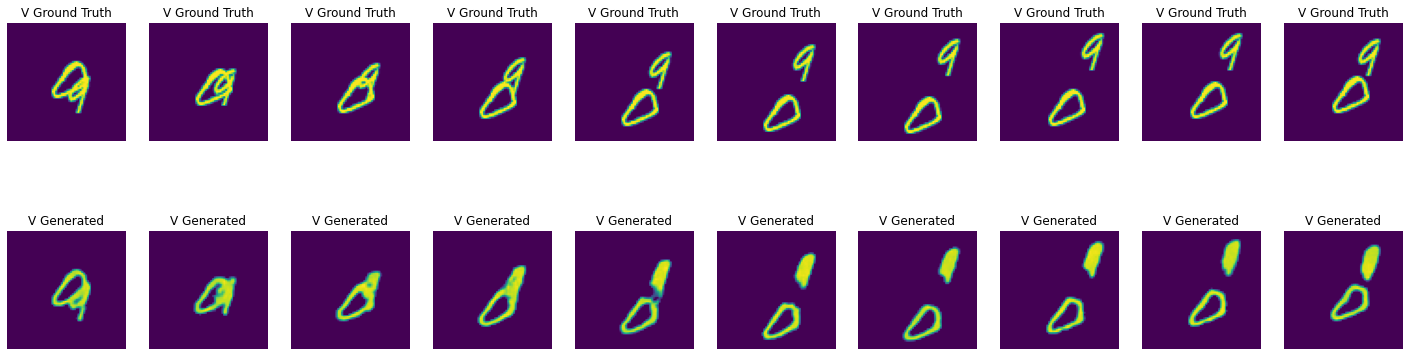

 45%|████▍     | 1349/3000 [03:31<03:35,  7.65it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


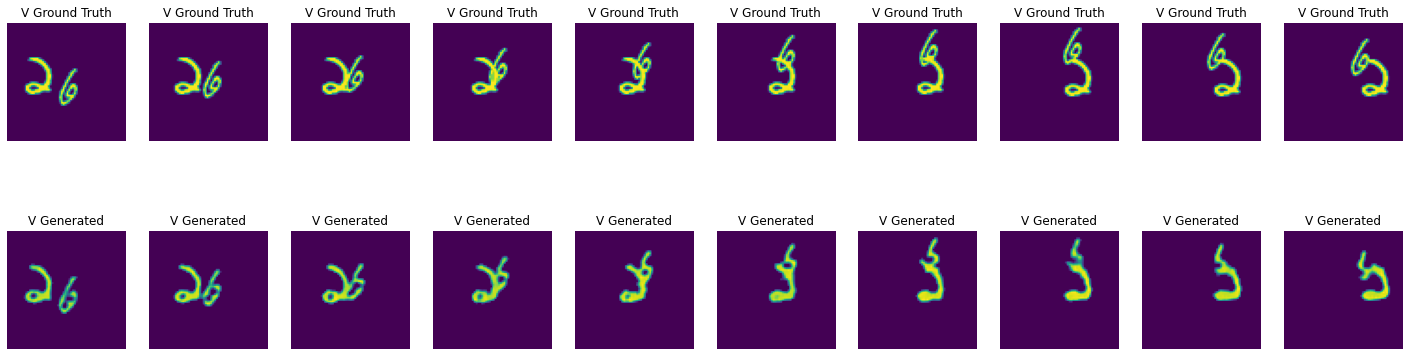

 47%|████▋     | 1399/3000 [03:38<03:29,  7.63it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


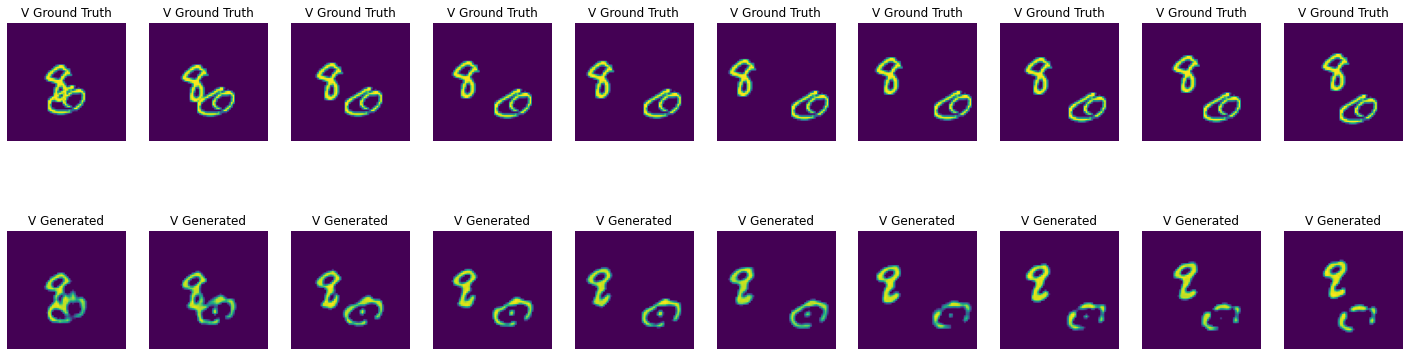

 47%|████▋     | 1422/3000 [03:42<03:31,  7.47it/s]

1.1391041278839111 1.3773788213729858


 48%|████▊     | 1449/3000 [03:46<03:26,  7.52it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


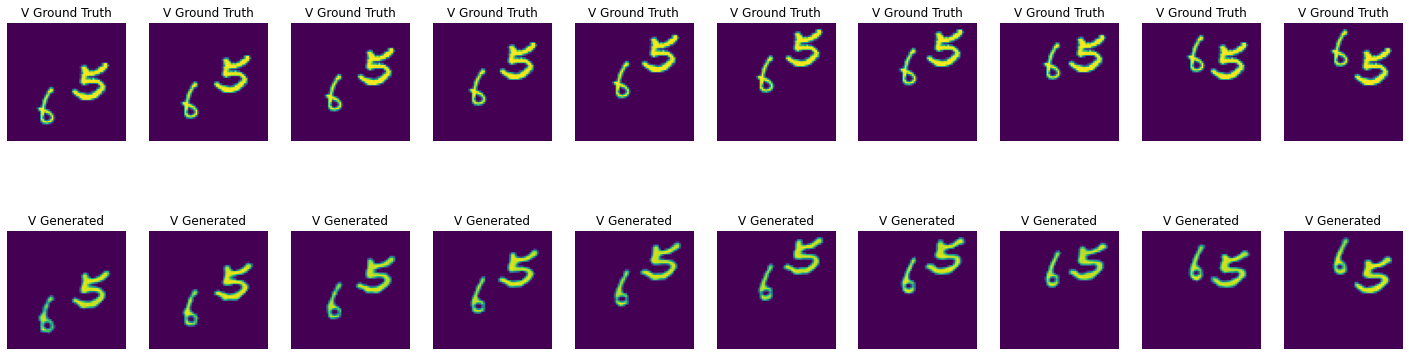

 50%|████▉     | 1499/3000 [03:54<03:19,  7.53it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


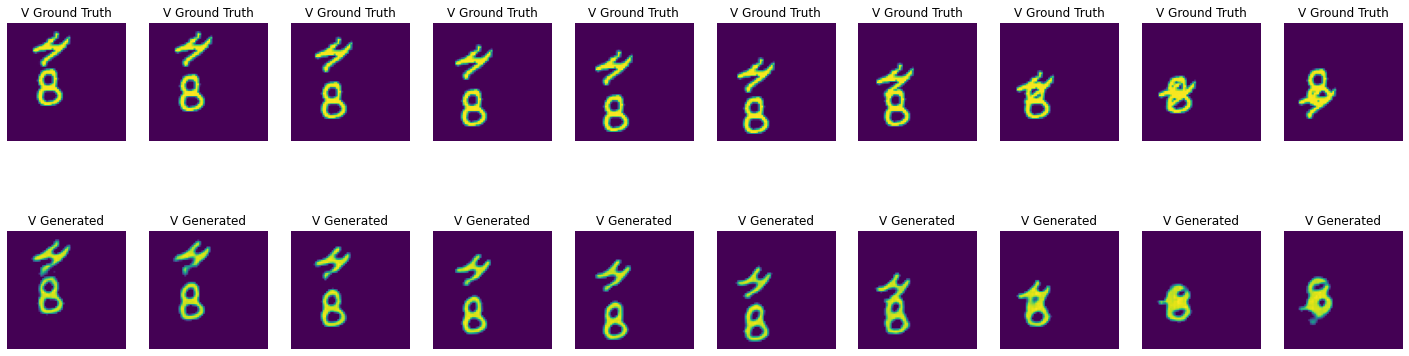

 52%|█████▏    | 1549/3000 [04:02<03:11,  7.56it/s]

[[0.         0.        ]
 [0.         0.02745098]]
[[0.        0.       ]
 [0.        0.4035569]]


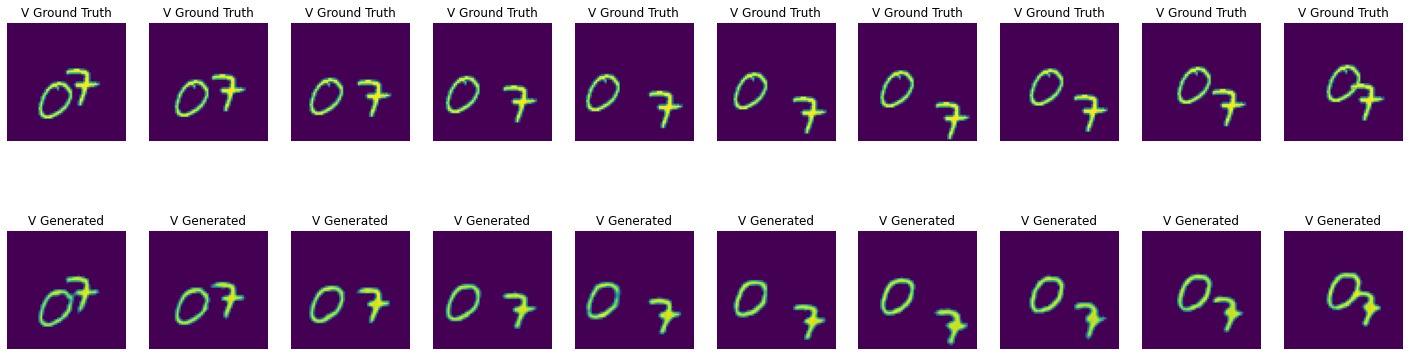

 53%|█████▎    | 1599/3000 [04:09<03:07,  7.46it/s]

[[0.99215686 0.99215686]
 [0.6862745  0.50980395]]
[[0.8501911  0.9089689 ]
 [0.66353834 0.55070084]]


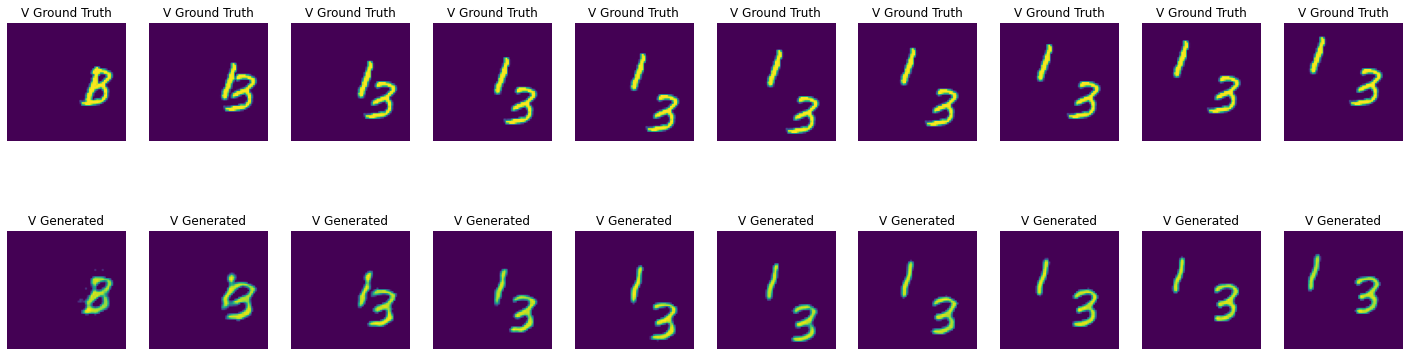

 55%|█████▍    | 1649/3000 [04:17<03:02,  7.42it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


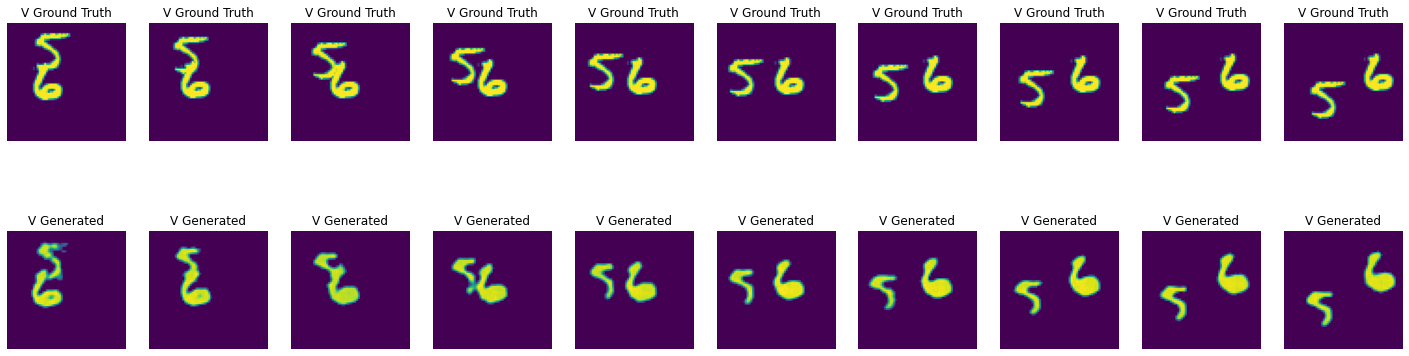

 55%|█████▌    | 1659/3000 [04:19<03:18,  6.75it/s]

1.1391041278839111 1.3773788213729858


 57%|█████▋    | 1699/3000 [04:25<02:50,  7.64it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


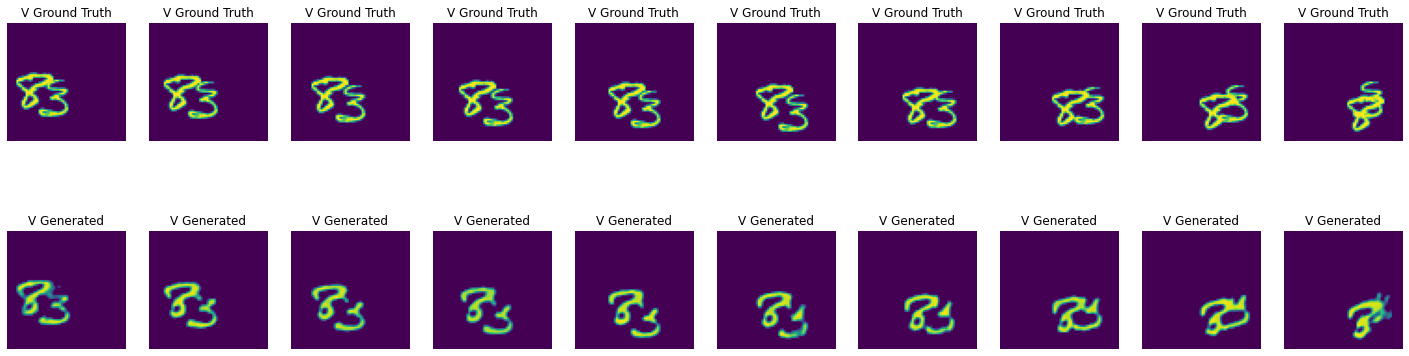

 58%|█████▊    | 1749/3000 [04:33<02:45,  7.54it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


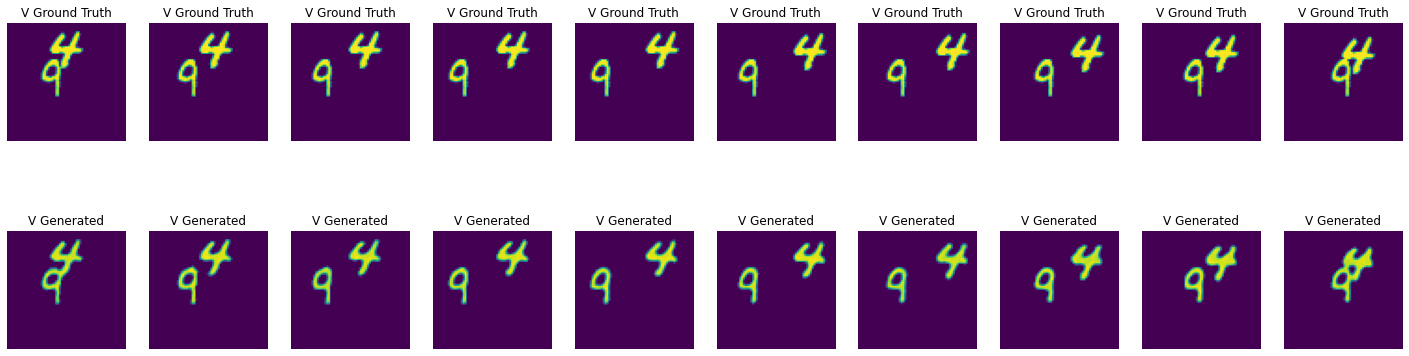

 60%|█████▉    | 1799/3000 [04:40<03:00,  6.65it/s]

[[0. 0.]
 [1. 0.]]
[[0.         0.        ]
 [0.23284552 0.        ]]


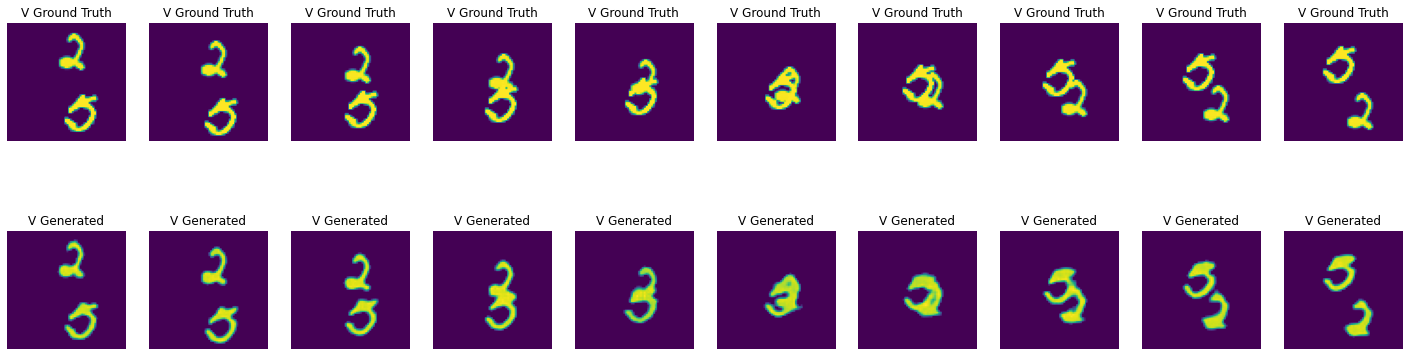

 62%|██████▏   | 1849/3000 [04:48<02:29,  7.68it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


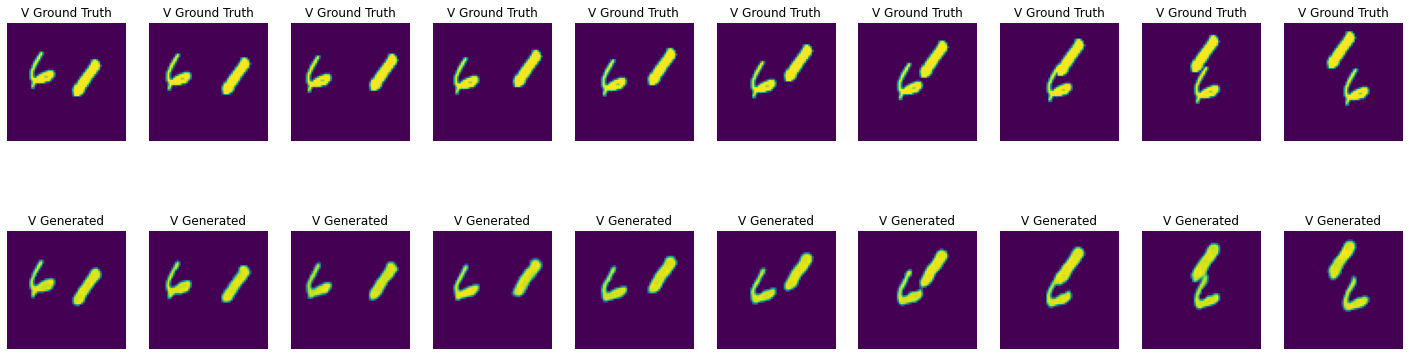

 63%|██████▎   | 1896/3000 [04:55<02:27,  7.47it/s]

1.1391041278839111 1.3773788213729858


 63%|██████▎   | 1899/3000 [04:55<02:26,  7.52it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


 65%|██████▍   | 1949/3000 [05:03<02:25,  7.22it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


 67%|██████▋   | 1999/3000 [05:11<02:14,  7.43it/s]

[[0.         0.08235294]
 [0.         0.19215687]]
[[0.         0.        ]
 [0.         0.33804137]]


 68%|██████▊   | 2049/3000 [05:19<02:06,  7.52it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


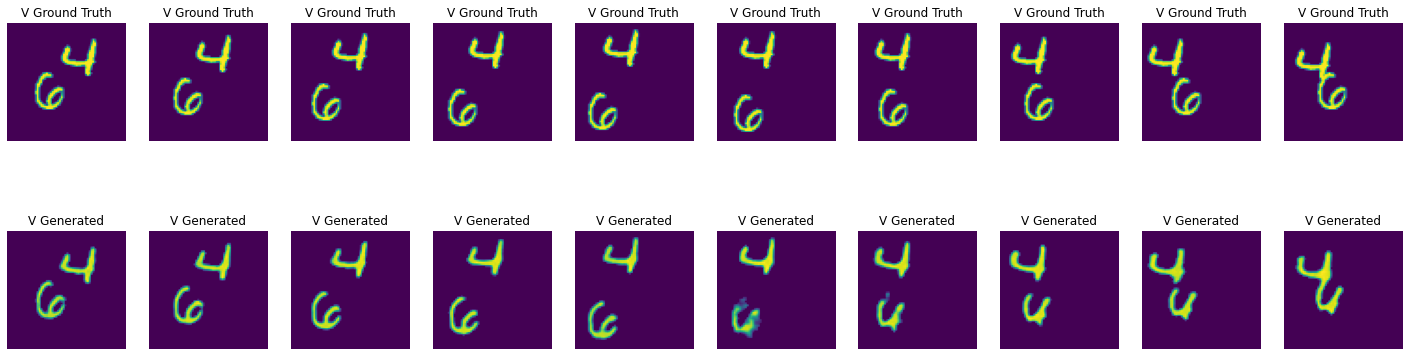

 70%|██████▉   | 2099/3000 [05:27<01:58,  7.59it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


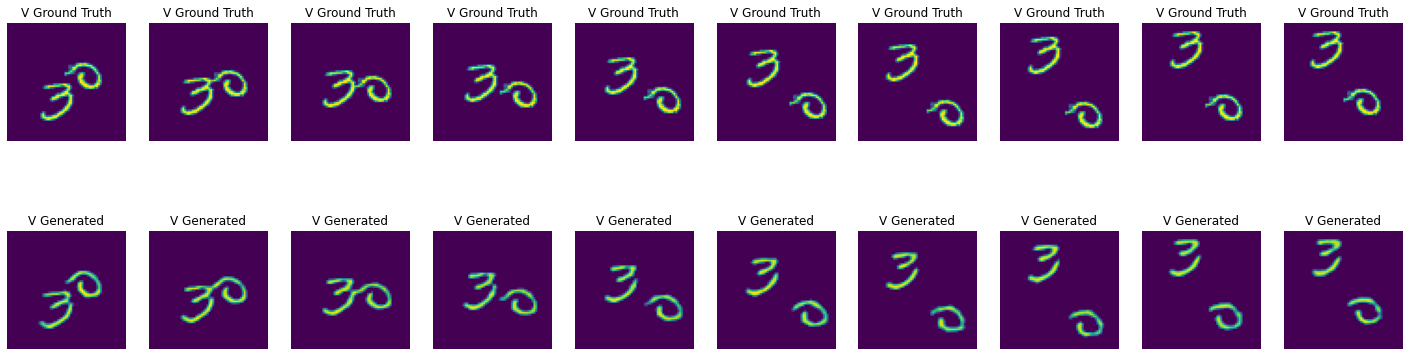

 71%|███████   | 2132/3000 [05:32<01:53,  7.65it/s]

1.1391041278839111 1.3773788213729858


 72%|███████▏  | 2149/3000 [05:34<01:52,  7.53it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


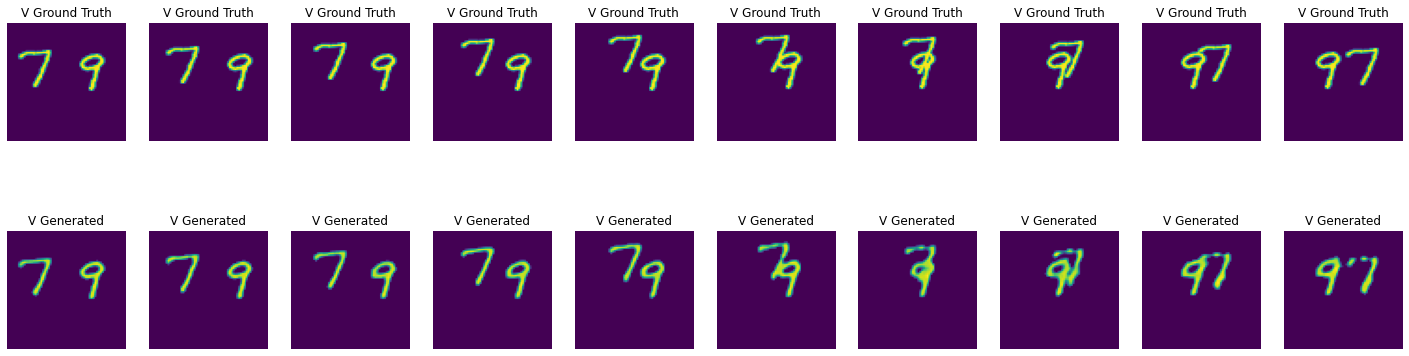

 73%|███████▎  | 2199/3000 [05:42<01:45,  7.59it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


 75%|███████▍  | 2249/3000 [05:50<01:38,  7.61it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


 77%|███████▋  | 2299/3000 [05:57<01:39,  7.03it/s]

[[0.9490196  0.99215686]
 [0.99215686 0.99215686]]
[[0.92950773 0.98579884]
 [0.9896575  0.9940704 ]]


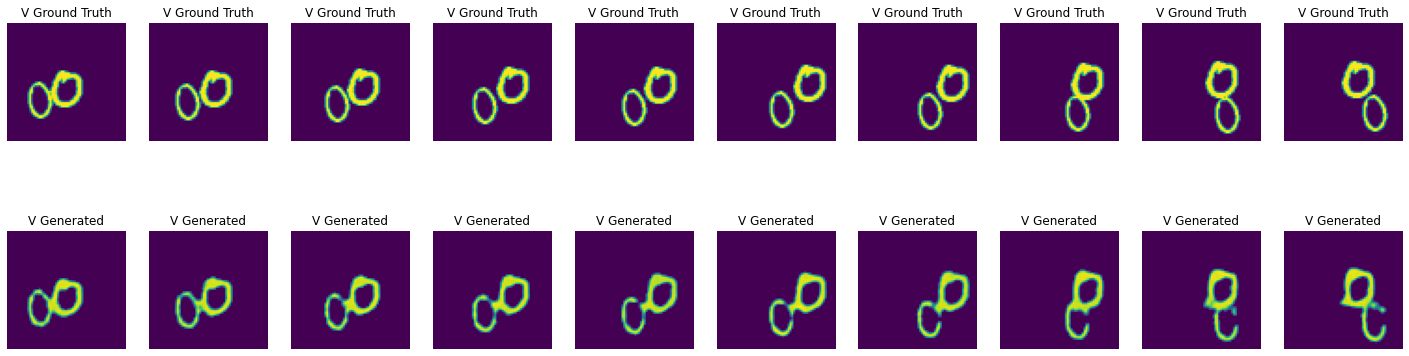

 78%|███████▊  | 2349/3000 [06:05<01:42,  6.34it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


 79%|███████▉  | 2369/3000 [06:09<01:26,  7.26it/s]

1.1391041278839111 1.3773788213729858


 80%|███████▉  | 2399/3000 [06:13<01:19,  7.59it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


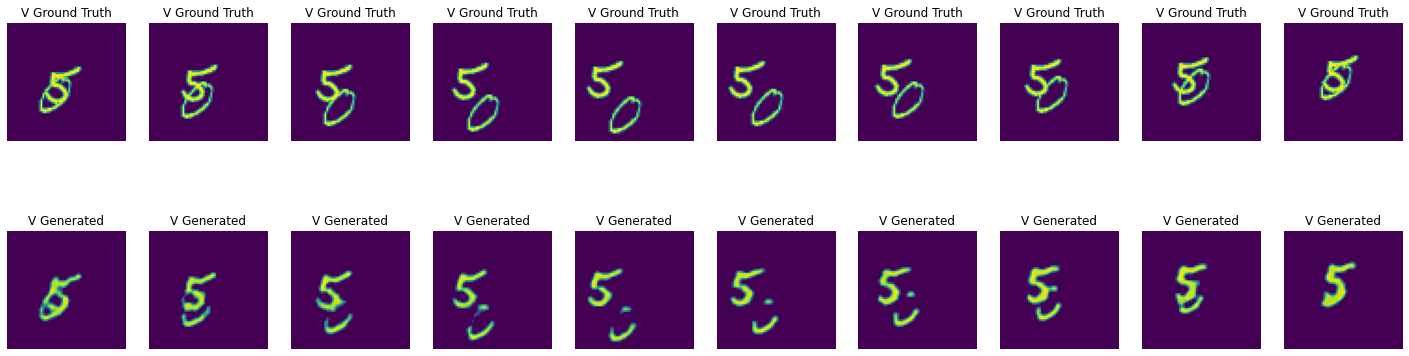

 82%|████████▏ | 2449/3000 [06:20<01:12,  7.62it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


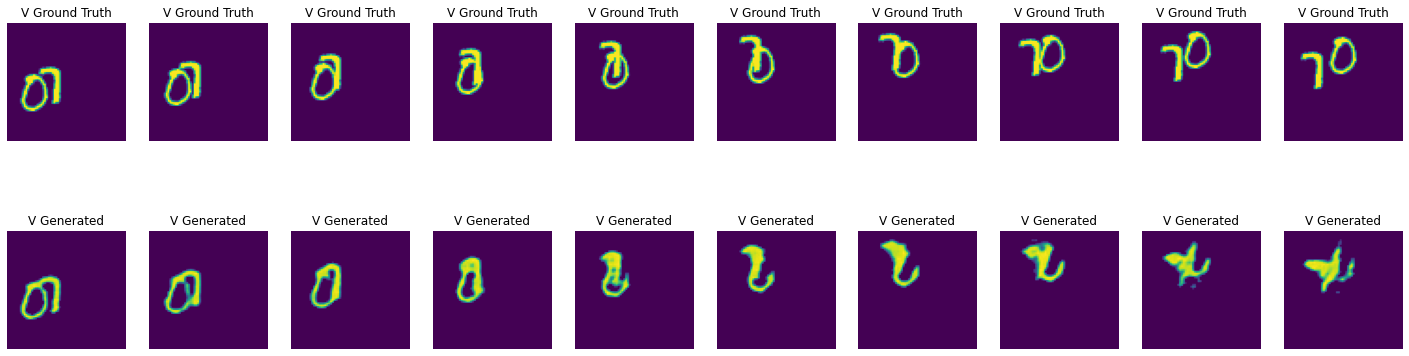

 83%|████████▎ | 2499/3000 [06:28<01:05,  7.61it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


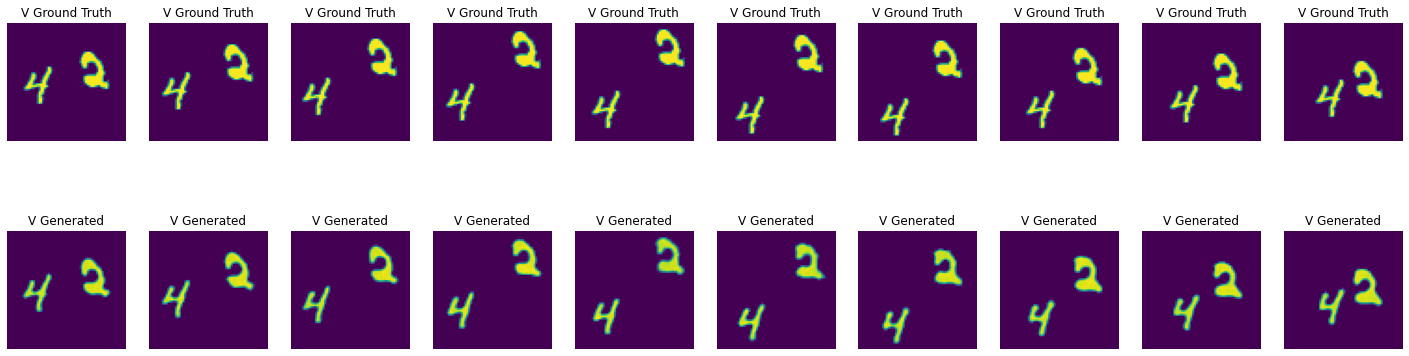

 85%|████████▍ | 2549/3000 [06:36<01:08,  6.60it/s]

[[0.9882353  0.9882353 ]
 [0.69803923 0.8666667 ]]
[[1.0276855 1.0488497]
 [0.7476301 1.01313  ]]


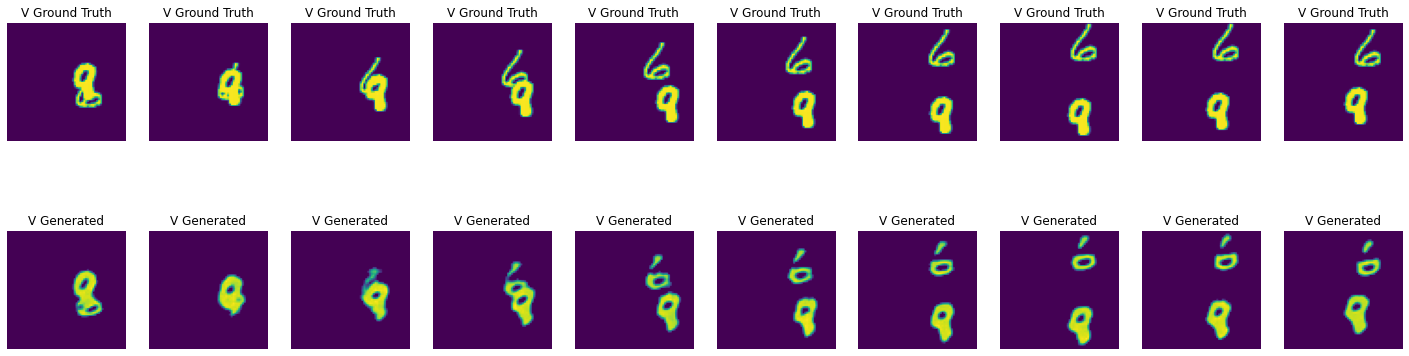

 87%|████████▋ | 2599/3000 [06:44<00:52,  7.67it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


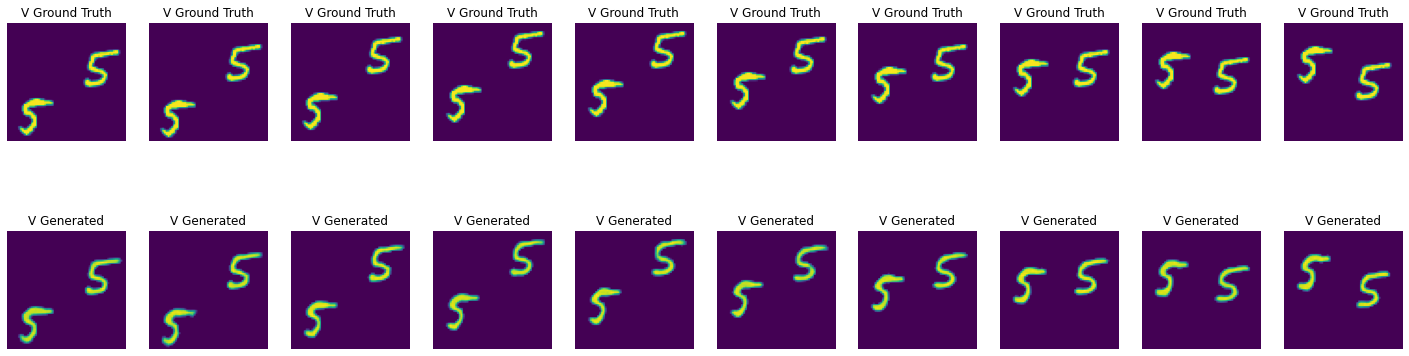

 87%|████████▋ | 2606/3000 [06:46<01:05,  5.98it/s]

1.1391041278839111 1.3773788213729858


 88%|████████▊ | 2649/3000 [06:51<00:46,  7.60it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


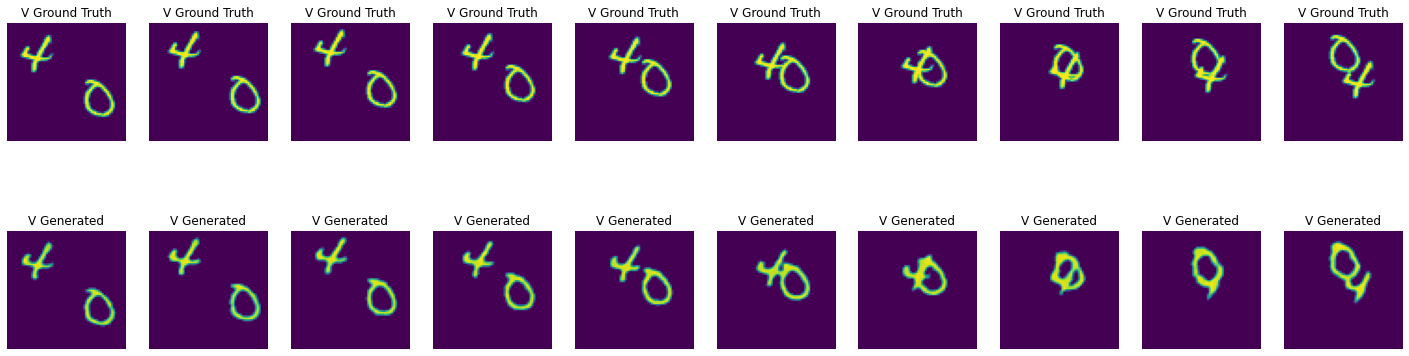

 90%|████████▉ | 2699/3000 [06:59<00:39,  7.64it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


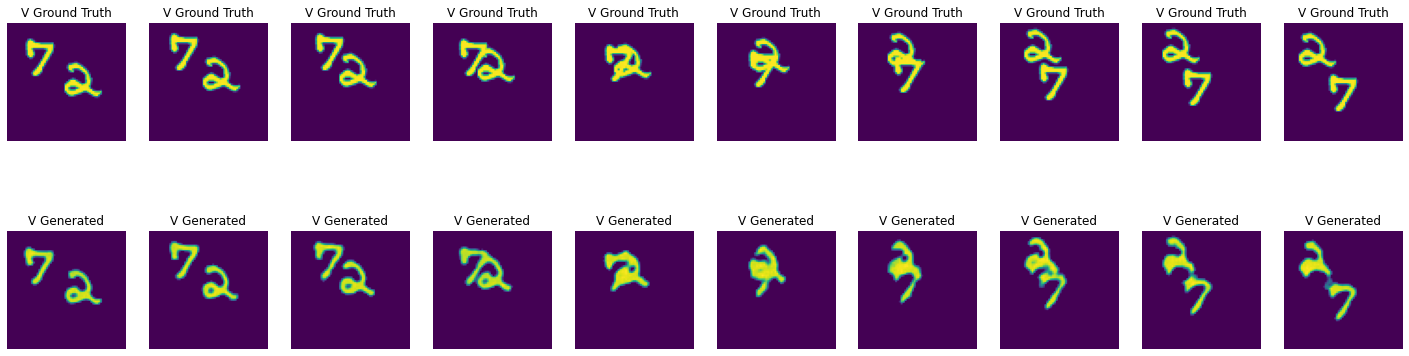

 92%|█████████▏| 2749/3000 [07:07<00:33,  7.54it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


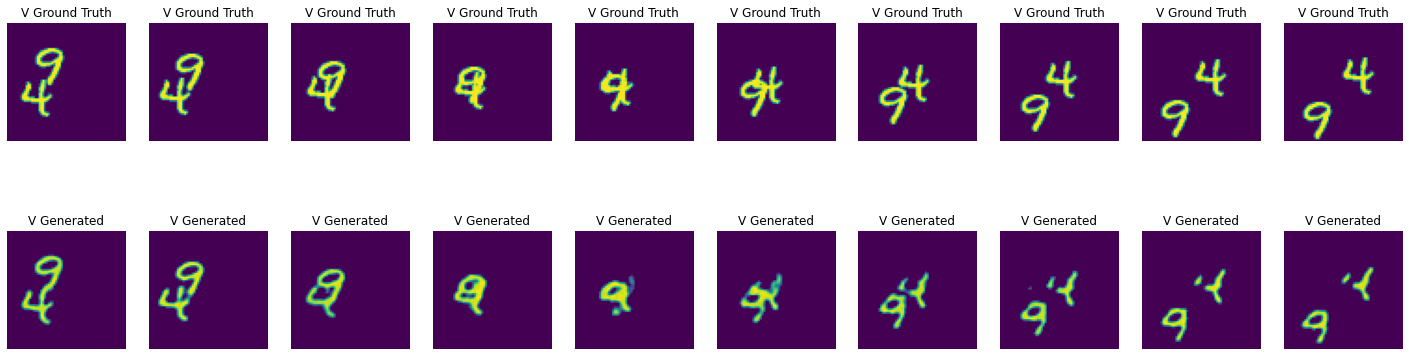

 93%|█████████▎| 2799/3000 [07:15<00:29,  6.78it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


 95%|█████████▍| 2843/3000 [07:22<00:20,  7.64it/s]

1.1391041278839111 1.3773788213729858


 95%|█████████▍| 2849/3000 [07:23<00:19,  7.65it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


 97%|█████████▋| 2899/3000 [07:30<00:13,  7.58it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


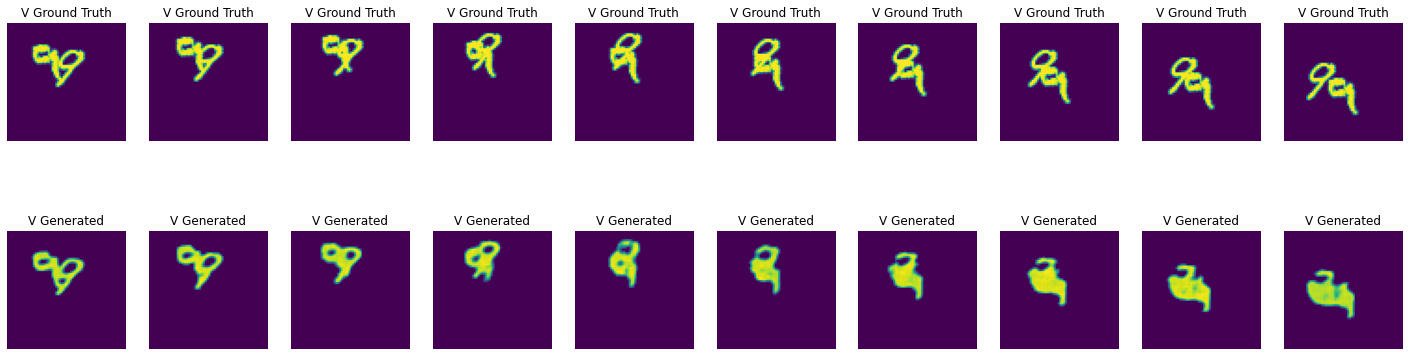

 98%|█████████▊| 2949/3000 [07:38<00:06,  7.59it/s]

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


100%|█████████▉| 2999/3000 [07:45<00:00,  7.55it/s]

[[0.10196079 0.99607843]
 [0.5372549  0.99607843]]
[[0.         0.80310607]
 [0.38164625 0.95075154]]


100%|██████████| 3000/3000 [07:46<00:00,  6.43it/s]

Eval MSE:  44.446126132011415
Eval MAE:  82.21720783487956
Avg-MSE: 0.01063971724829947
MSE/Frame: [0.00422093 0.00560809 0.00707495 0.0084435  0.0099406  0.01132186
 0.01281388 0.01421434 0.01563455 0.01712447]
Avg-MAE: 0.019738360961732843
MAE/Frame: [0.0118884  0.01379164 0.01565092 0.01729283 0.01908105 0.02070734
 0.02239424 0.023937   0.02550793 0.02713225]
Avg-SSIM: 0.9062559856367172
SSIM/Frame: [0.94597607 0.93624041 0.92664678 0.91813348 0.90905179 0.90082574
 0.89257071 0.88505306 0.87771486 0.87034694]
Avg-PSNR: 20.313958684001296
PSNR/Frame: [23.86766656 22.63342911 21.68144814 20.93993677 20.25911572 19.68694104
 19.15353877 18.71369637 18.2997636  17.90405074]
Avg-LPIPS: 5.567483732216248
LPIPS/Frame: [2.4977483  3.27662244 4.05587918 4.71436125 5.4129227  6.02588226
 6.63043334 7.11156689 7.72292138 8.22649957]


In [30]:
print('Initializing models')

model = Model(args)

if args.is_training:
    if not os.path.exists(args.save_dir):
        os.makedirs(args.save_dir)
    if not os.path.exists(args.gen_frm_dir):
        os.makedirs(args.gen_frm_dir)
    train_wrapper(model)
else:
    if not os.path.exists(args.gen_frm_dir):
        os.makedirs(args.gen_frm_dir)
    test_wrapper(model)